In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import databuilder


emergency_df = databuilder.get_emergency_data()
moon_df = databuilder.get_full_moon_data()

Successfully loaded data for ./Resources/COS2019.csv
Successfully loaded data for ./Resources/COS2020.csv
Successfully loaded data for ./Resources/COS2021.csv
Successfully loaded data for ./Resources/COS2022.csv
Successfully loaded data for ./Resources/COS2023.csv

Successfully combined 5 files
Total records: 1,150,331
Successfully loaded data for ./Resources/full_moons.csv

Successfully combined 1 files
Total records: 1,868


In [2]:
moon_df.info()
emergency_df.info()

# Filter for Total Eclipse events
total_eclipse_series = moon_df[moon_df['Flag'] == 'Total Eclipse']

# Filter for dates between 2019 and 2023
total_eclipse_series = total_eclipse_series[
    (total_eclipse_series['DateTime'].dt.year >= 2019) & 
    (total_eclipse_series['DateTime'].dt.year <= 2023)
]

# Group by date and count accidents per day
daily_accidents = emergency_df.groupby(
    emergency_df['REPORTED'].dt.date
)['INCIDENT'].count()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868 entries, 0 to 1867
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Day       1868 non-null   object        
 1   Flag      1868 non-null   object        
 2   DateTime  1868 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 43.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150331 entries, 0 to 1150330
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   INCIDENT  1150331 non-null  int64         
 1   REPORTED  1150331 non-null  datetime64[ns]
 2   CLOSED    1150317 non-null  datetime64[ns]
 3   CATEGORY  1150331 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 35.1+ MB


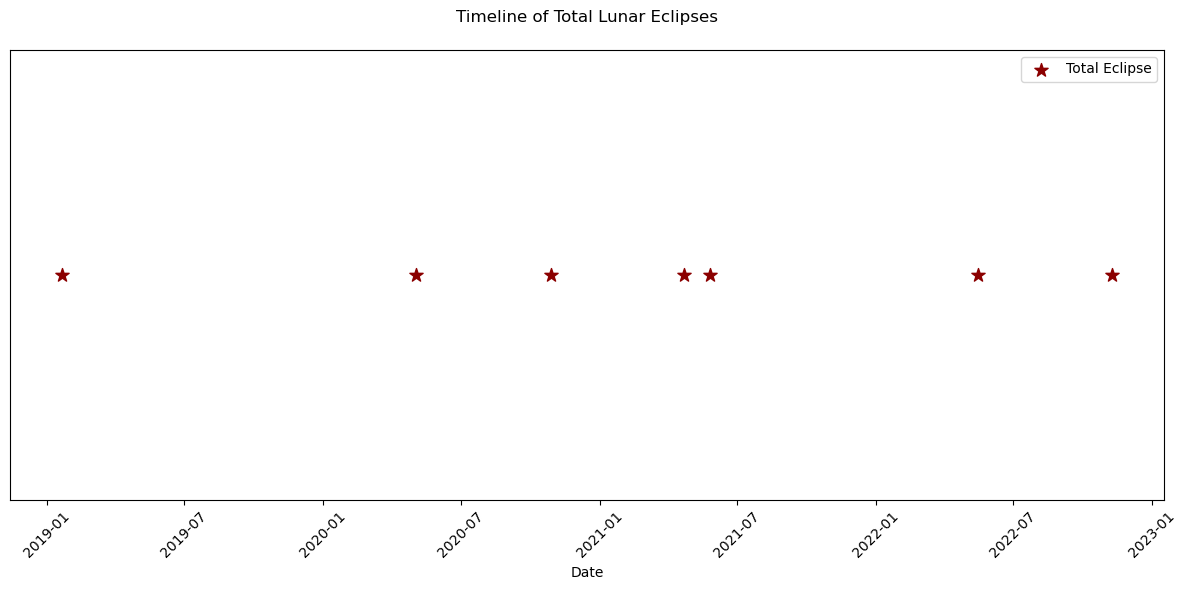

In [9]:
# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot the total eclipse events
plt.scatter(total_eclipse_series['DateTime'], 
           [1] * len(total_eclipse_series),
           marker='*', 
           s=100,
           color='darkred',
           label='Total Eclipse')

# Customize the plot
plt.title('Timeline of Total Lunar Eclipses', pad=20)
plt.xlabel('Date')
plt.yticks([])  # Hide y-axis ticks since we're just showing events

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()


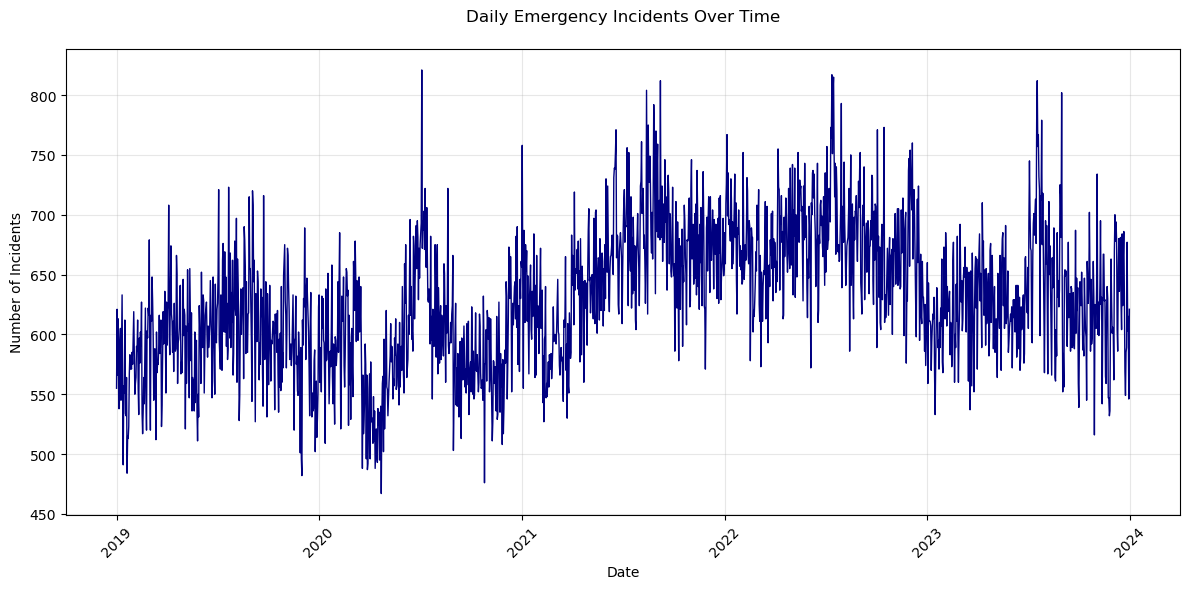

In [ ]:
# Create a figure and axis
plt.figure(figsize=(12, 6))



# Create the line plot
plt.plot(daily_accidents.index, 
         daily_accidents.values,
         linewidth=1,
         color='navy')

# Customize the plot
plt.title('Daily Emergency Incidents Over Time', pad=20)
plt.xlabel('Date')
plt.ylabel('Number of Incidents')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid for easier reading
plt.grid(True, alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()



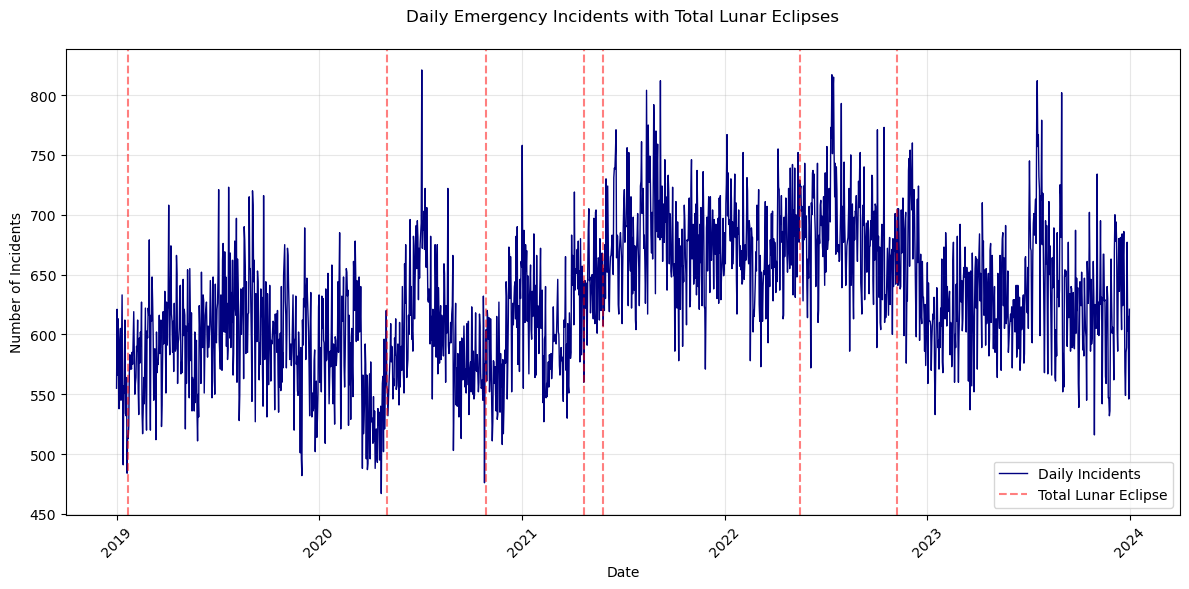

In [11]:
# Create a figure and axis
plt.figure(figsize=(12, 6))

# Group by date and count accidents per day
daily_accidents = emergency_df.groupby(
    emergency_df['REPORTED'].dt.date
)['INCIDENT'].count()

# Create the line plot for daily incidents
plt.plot(daily_accidents.index, 
         daily_accidents.values,
         linewidth=1,
         color='navy',
         label='Daily Incidents')

# Plot total lunar eclipses as vertical lines
for eclipse_date in total_eclipse_series['DateTime']:
    plt.axvline(x=eclipse_date.date(), 
                color='red', 
                linestyle='--', 
                alpha=0.5)

# Customize the plot
plt.title('Daily Emergency Incidents with Total Lunar Eclipses', pad=20)
plt.xlabel('Date')
plt.ylabel('Number of Incidents')

# Add legend
plt.legend(['Daily Incidents', 'Total Lunar Eclipse'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid for easier reading
plt.grid(True, alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()
